In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from ipywidgets import interact, fixed

def im_filter(noise,bkg,width):


    #Generate noisy image of a square
#    im = np.zeros((128, 128))
#    im[32:-32, 32:-32] = 1

    # Generate noisy image of a Gaussian
    im = Gaussian2DKernel(10,x_size=128,y_size=128).array
    im = im/im.max()

    imn = im + np.random.poisson(noise, size=im.shape) + np.random.poisson( bkg, size=im.shape)    
    #im = ndi.rotate(im, 15, mode='constant')
    #im = ndi.gaussian_filter(im, 4)
#    imn = im + noise * np.random.random(im.shape)

    f = np.fft.rfft2(im)                  #do the fourier transform
    fshift = np.fft.fftshift(f)          #shift the zero to the center    

    f = np.fft.rfft2(imn)                  #do the fourier transform
    fshift1 = np.fft.fftshift(f)          #shift the zero to the center

#    Simple & Stupid filtering with a window around the central value. Set all the rest to zero
    filtdat = fshift1.copy() * 0
    xsize,ysize=fshift1.shape
    filtdat[xsize/2-width:xsize/2+width,ysize/2-width:ysize/2+width] = fshift1[xsize/2-width:xsize/2+width,ysize/2-width:ysize/2+width]


    f_ishift = np.fft.ifftshift(filtdat) 
    img_back2 = np.fft.irfft2(f_ishift) 
    img_back2 = np.abs(img_back2)

    
    fig, ( (ax1, ax2, ax3), (ax4,ax5, ax6) ) = plt.subplots(2, 3, figsize=(15,10))    

    cax1=ax1.imshow(im,interpolation='nearest')
    ax1.set_title('original image')
    plt.colorbar(cax1,ax=ax1,fraction=0.046, pad=0.03)

    
    cax2=ax2.imshow(imn,interpolation='nearest')
    ax2.set_title('original image + noise')
    plt.colorbar(cax2,ax=ax2,fraction=0.046, pad=0.03)

    cax3=ax3.imshow(img_back2,interpolation='nearest')
    ax3.set_title('filtered image')
    plt.colorbar(cax3,ax=ax3,fraction=0.046, pad=0.03)

    cax4=ax4.imshow(np.log10(abs(fshift)),interpolation='nearest' )
    ax4.set_title('FFT of original image')
    plt.colorbar(cax4,ax=ax4,fraction=0.046, pad=0.03)    
    
    cax5=ax5.imshow(np.log10(abs(fshift1)),interpolation='nearest' )
    ax5.set_title('FFT of noisy image')
    plt.colorbar(cax5,ax=ax5,fraction=0.046, pad=0.03)

    cax6=ax6.imshow(np.log10(abs(filtdat)),interpolation='nearest' )   
    ax6.set_title('filtered FFT')
    plt.colorbar(cax6,ax=ax6,fraction=0.046, pad=0.03)
    
    plt.show()

/Users/facero/Documents/Work/Program/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/facero/Documents/Work/Program/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in log10


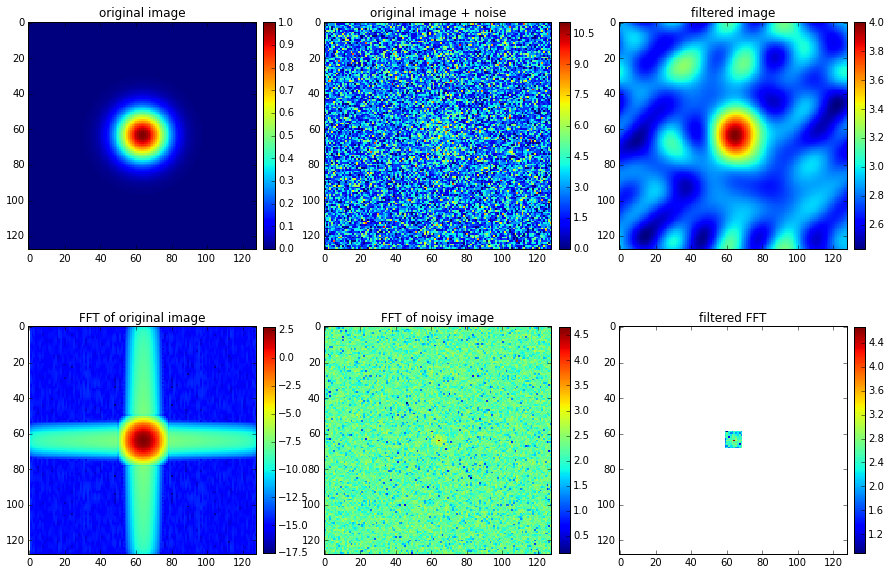

None

<function __main__.im_filter>

In [36]:
interact(im_filter,noise=(0.5,5,1),bkg=(0.1,0.5,0.1),width=(1,10,1))

In [32]:
im.shape

(64, 64)

In [11]:
size=64
im = Gaussian2DKernel(10,x_size=size,y_size=size).array
im = im/im.max()
im += 5 * np.random.random(im.shape)
width= 5

In [12]:
%%timeit
f = np.fft.rfft2(im)                  #do the fourier transform with rfft2 instead of fft2 
fshift1 = np.fft.fftshift(f)          #shift the zero to the center

#    Simple & Stupid filtering with a window around the central value. Set all the rest to zero
filtdat = fshift1.copy() * 0
xsize,ysize=fshift1.shape
filtdat[xsize/2-width:xsize/2+width,ysize/2-width:ysize/2+width] = fshift1[xsize/2-width:xsize/2+width,ysize/2-width:ysize/2+width]

f_ishift = np.fft.ifftshift(filtdat) 
img_back2 = np.fft.irfft2(f_ishift) 


1000 loops, best of 3: 221 µs per loop
